   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

<ipython-input-16-3744435751>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_df.groupby('age_group')['output'].mean().plot(kind='bar',title='Heart Disease Risk by Age Group.')


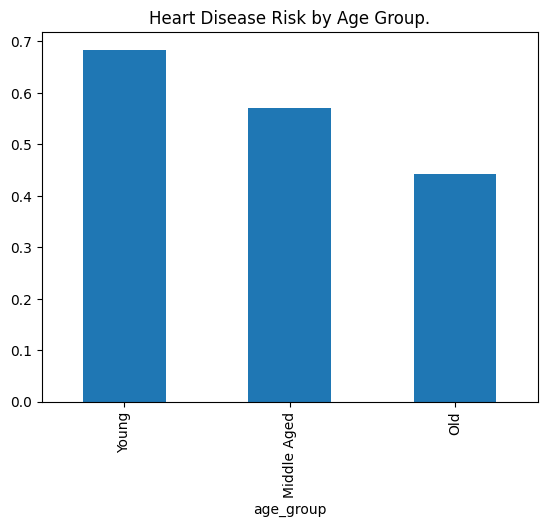

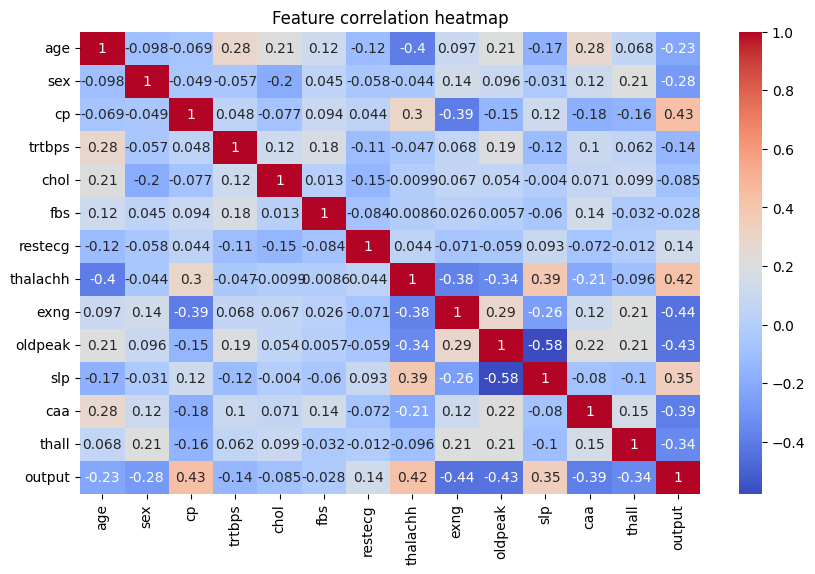

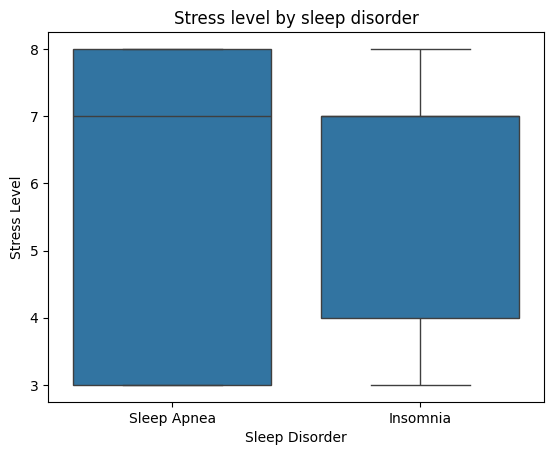

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
heart_df=pd.read_csv('/content/heart.csv')
print(heart_df.head())
heart_df.info()
heart_df.isnull().sum()
x=heart_df.drop('output',axis=1)
y=heart_df['output']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
heart_df['age_group']=pd.cut(heart_df['age'],bins=[20,40,60,80],labels=['Young','Middle Aged','Old'])
heart_df.groupby('age_group')['output'].mean().plot(kind='bar',title='Heart Disease Risk by Age Group.')
plt.figure(figsize=(10,6))
sns.heatmap(heart_df.drop('age_group',axis=1).corr(),annot=True,cmap='coolwarm')
plt.title('Feature correlation heatmap')
plt.show()
sleep_df=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
sns.boxplot(x='Sleep Disorder',y='Stress Level',data=sleep_df)
plt.title('Stress level by sleep disorder')
plt.show()